In [165]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob as g

#create bias array
bias = sorted(g.glob('../Documents/Obsv_Astro/CHJ_bias_images/*.fit'))
bias_corrected = np.zeros([len(bias), 3522, 4656])
bias_header = []
for i in range(len(bias)):
    foo = fits.open(bias[i])
    bias_corrected[i,:,:] = foo[0].data / 16+1
    bias_header.append(foo[0].header)
    foo.close()
    #del foo[0].data
#calculate mean and median of bias
bias_mean = np.mean(bias_corrected, axis=0)
bias_median = np.median(bias_mean)
print('Median of bias images in counts',bias_median)


Median of bias images in counts 153.65


In [167]:
#load dark images
dark = sorted(g.glob('../Documents/Obsv_Astro/dark_images/*.fit'))
dark_array = np.zeros([len(dark),3522, 4656])
dark_header = []
#loop through the files, store their values in array 'dark_array'
#then calculate the mean and median of the 'dark_array'
for i in range(len(dark)):
    dark_foo = fits.open(dark[i])
    dark_array[i,:,:] = dark_foo[0].data / 16+1
    dark_header.append(dark_foo[0].header)
    dark_foo.close()
    #del dark_foo[0].data
dark_mean = np.mean(dark_array, axis=0)
dark_median = np.median(dark_mean)
print('Median of dark images in counts',dark_median)



Median of dark images in counts 154.6


In [169]:
#load fits and normalize them
flats = sorted(g.glob('../Documents/Obsv_Astro/twilight_images/*.fit'))
flat_array = np.zeros([20, 3522, 4656])
flat_header = []

#create normalized flats
for i in range(20):
    flat_foo = fits.open(flats[i])
    flat_array[i,:,:] = ((flat_foo[0].data / 16+1) - bias_mean) / (np.median(flat_foo[0].data - bias_median))
    flat_header.append(flat_foo[0].header)
    flat_foo.close()
    #del flat_foo[0].data
normalized_flat = flat_array[0]


Text(0.5, 1.0, 'Normalized Twilight Flat Image: QHY 163 CMOS')

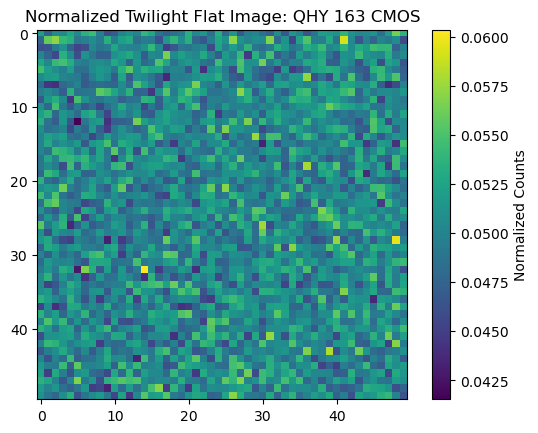

In [171]:
#plot normalized flat image for 50x50 pixel range
plt.imshow(flat_array[0][0:50,0:50])
plt.colorbar(label='Normalized Counts')
plt.title('Normalized Twilight Flat Image: QHY 163 CMOS')

Average Read Noise -0.0347362337496511


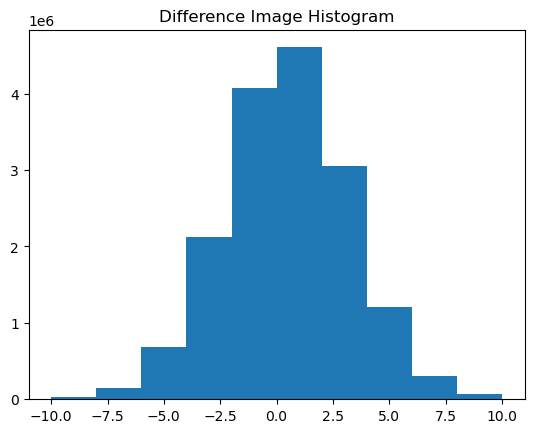

In [173]:
#plot histogram of difference image and find average read noise
diff_image = (bias_corrected[1] - bias_corrected[0])
diff_image_flatten = diff_image.flatten()
read_noise = (bias_corrected[1] - bias_corrected[0]) / np.sqrt(2)
average_read_noise = np.mean(read_noise)
print('Average Read Noise', average_read_noise)
plt.hist(diff_image_flatten, range=(-10,10))
plt.title('Difference Image Histogram')
plt.show()

Text(0.5, 1.0, 'Albireo: QHY 163 CMOS')

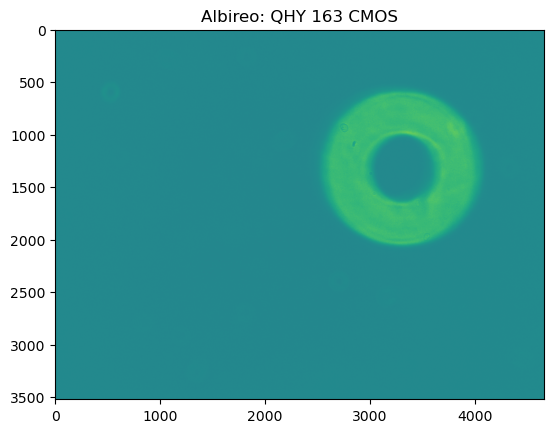

In [175]:
#create Albireo science image
albi = '../Documents/Obsv_Astro/science_images/alberio_2.fit'
albi_foo = fits.open(albi)
albi_data = albi_foo[0].data / 16+1
albi_header = albi_foo[0].header
albi_image = (albi_data - (dark_mean - bias_mean)) / normalized_flat
plt.imshow(albi_image)
plt.title('Albireo: QHY 163 CMOS')

Text(0.5, 1.0, 'Altair: QHY 163 CMOS')

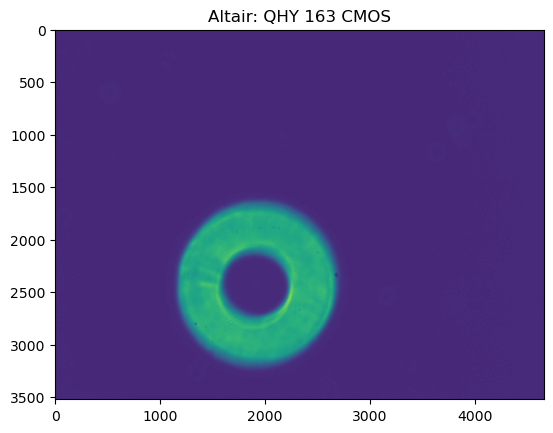

In [177]:
#create Altair science image
altair = '../Documents/Obsv_Astro/science_images/Altair_4.fit'
altair_foo = fits.open(altair)
altair_data = altair_foo[0].data / 16+1
altair_header = altair_foo[0].header
altair_image = (altair_data - (dark_mean - bias_mean)) / normalized_flat
plt.imshow(altair_image)
plt.title('Altair: QHY 163 CMOS')